# Clone a fork of donut where predictions are returned with token indices

In [4]:
!git clone https://github.com/SamSamhuns/donut

Cloning into 'donut'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 224 (delta 59), reused 58 (delta 46), pack-reused 133
Receiving objects: 100% (224/224), 62.76 MiB | 15.23 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [5]:
%cd /content/donut
%pip install .

/content/donut
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/donut
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 4.7 MB 24.7 MB/s 
     |████████████████████████████████| 509 kB 54.8 MB/s 
     |████████████████████████████████| 365 kB 62.4 MB/s 
     |████████████████████████████████| 706 kB 65.2 MB/s 
     |████████████████████████████████| 1.3 MB 55.5 MB/s 
     |████████████████████████████████| 419 kB 67.6 MB/s 
     |████████████████████████████████| 5.9 MB 59.2 MB/s 
     |████████████████████████████████| 109 kB 76.6 MB/s 


In [6]:
%cd /content/donut
!wget https://datasets-server.huggingface.co/assets/naver-clova-ix/cord-v2/--/naver-clova-ix--cord-v2/train/12/image/image.jpg

/content/donut
--2022-09-10 14:36:20--  https://datasets-server.huggingface.co/assets/naver-clova-ix/cord-v2/--/naver-clova-ix--cord-v2/train/12/image/image.jpg
Resolving datasets-server.huggingface.co (datasets-server.huggingface.co)... 54.157.109.108, 54.163.108.228, 34.226.254.71, ...
Connecting to datasets-server.huggingface.co (datasets-server.huggingface.co)|54.157.109.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59702 (58K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  58.30K   128KB/s    in 0.5s    

2022-09-10 14:36:21 (128 KB/s) - ‘image.jpg’ saved [59702/59702]



# Document Parsing Example

In [7]:
import torch
from PIL import Image
from donut import DonutModel, DonutModelCustom

from pprint import pprint as pp


model = DonutModelCustom.from_pretrained(
    "naver-clova-ix/donut-base-finetuned-cord-v2")

if torch.cuda.is_available():
    model.half()
    device = torch.device("cuda")
    model.to(device)
else:
    model.encoder.to(torch.bfloat16)
model.eval()

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLMRobertaTokenizer'. 
The class this function is called from is 'BARTCustomTokenizer'.


DonutModel(
  (encoder): SwinEncoder(
    (model): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (0): BasicLayer(
          (blocks): Sequential(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (mlp): M

In [8]:
img_path = "image.jpg"
image = Image.open(img_path).convert("RGB")
output = model.inference(image=image, prompt="<s_cord-v2>", return_attentions=True, return_confs=True, return_tokens=True)

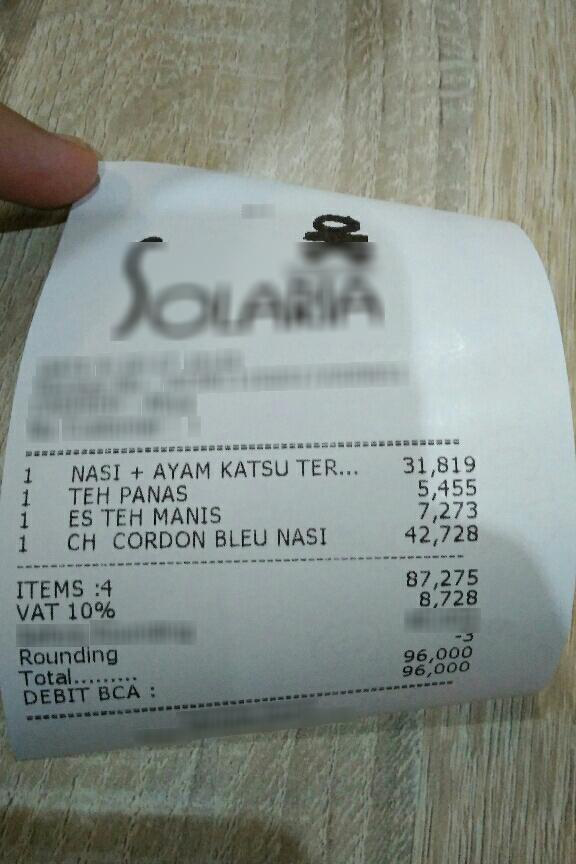

In [9]:
image

In [10]:
output["predictions"]

[{'menu': [{'nm': ['NASI + AYAM KATSU TER...',
     0.9999186197916666,
     [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]],
    'cnt': ['1', 1.0, [17]],
    'price': ['31,819', 1.0, [20, 21, 22]]},
   {'nm': ['TEH PANAS', 0.999755859375, [26, 27, 28, 29]],
    'cnt': ['1', 1.0, [32]],
    'price': ['5,455', 1.0, [35, 36, 37, 38]]},
   {'nm': ['ES TEH MANIS', 1.0, [42, 43, 44, 45, 46]],
    'cnt': ['1', 1.0, [49]],
    'price': ['7,273', 1.0, [52, 53, 54, 55]]},
   {'nm': ['CH CORDON BLEU NASI',
     0.9999302455357143,
     [59, 60, 61, 62, 63, 64, 65]],
    'cnt': ['1', 1.0, [68]],
    'price': ['42,728', 1.0, [71, 72, 73, 74]]}],
  'sub_total': {'subtotal_price': ['87,275', 1.0, [79, 80, 81, 82]],
   'tax_price': ['8,728', 1.0, [85, 86, 87]],
   'etc': ['-3', 1.0, [90, 91]]},
  'total': {'total_price': ['96,000', 1.0, [96, 97]],
   'creditcardprice': ['96,000', 1.0, [100, 101]],
   'menuqty_cnt': ['ITEMS :4', 0.99990234375, [104, 105, 106, 107, 108]]}}]

In [11]:
cross_attentions = output["attentions"]["cross_attentions"]

In [12]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import cv2


def apply_fusion(fusion_mode: str, unfused_tensor: torch.Tensor, dim: int) -> torch.Tensor:
    if fusion_mode == "mean":
        fused_tensor = torch.mean(unfused_tensor, dim=dim)
    elif fusion_mode == "max":
        fused_tensor = torch.max(unfused_tensor, dim=dim)[0]
    elif fusion_mode == "min":
        fused_tensor = torch.min(unfused_tensor, dim=dim)[0]
    else:
        raise NotImplementedError(f"{fusion_mode} fusion not supported")
    return fused_tensor

## token_indices must be selected from the output of model predictions when return_tokens is set to True.

These token indices are acquired after modifying the XLMRoBERTaTokenizer's `batch_decode`, `decode`, and `_decode` methods inside `donut/model_custom.py`

In [13]:
token_indexes = [59, 60, 61, 62, 63, 64, 65]  # represents the token indices for 'CH CORDON BLEU NASI' as seen in output["predictions"]

In [14]:
agg_heatmap = np.zeros([1280, 960], dtype=np.uint8)
head_fusion_type = ["mean", "max", "min"][1]
layer_fusion_type = ["mean", "max", "min"][1]

for tidx in token_indexes:    
    hmaps = torch.stack(cross_attentions[tidx], dim=0)
    # shape [4, 1, 16, 1, 1200]->[1, 4, 16, 1200]
    hmaps = hmaps.permute(1, 3, 0, 2, 4).squeeze(0)
    # shape [1, 4, 16, 1200]->[4, 16, 1200]
    hmaps = hmaps[-1]
    # change shape [4, 16, 1200]->[4, 16, 40, 30]
    hmaps = hmaps.view(4, 16, 40, 30)
    # fusing 16 decoder attention heads i.e. [4, 16, 40, 30]-> [16, 40, 30]
    hmaps = apply_fusion(head_fusion_type, hmaps, dim=1)
    # fusing 4 decoder layers from BART i.e. [16, 40, 30]-> [40, 30]
    hmap = apply_fusion(layer_fusion_type, hmaps, dim=0)

    hmap = hmap.unsqueeze(dim=-1).cpu().numpy()
    hmap = (hmap * 255.).astype(np.uint8)  # (40, 30, 1) uint8
    # fuse heatmaps for different tokens by taking the max
    agg_heatmap = np.max(np.asarray([agg_heatmap, cv2.resize(hmap, (960, 1280))]), axis=0).astype(np.uint8)

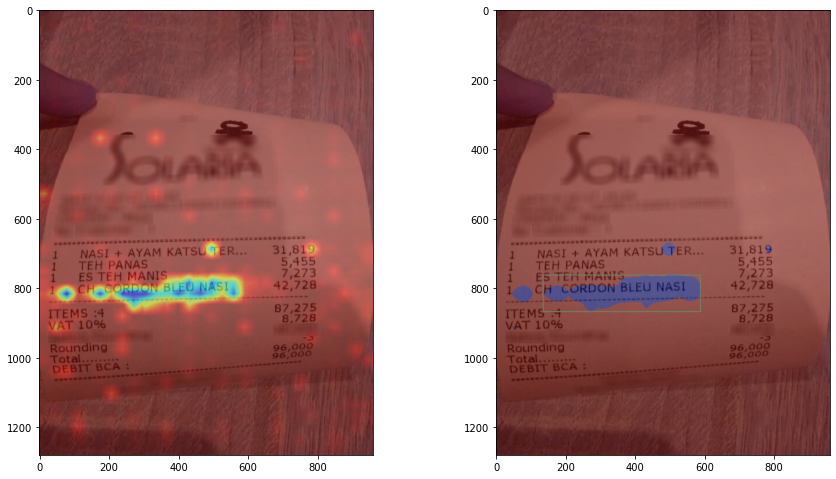

In [15]:
image = cv2.imread("image.jpg")
image = cv2.resize(image, (960, 1280))

raw_heatmap = deepcopy(agg_heatmap)
raw_image = deepcopy(image)

# threshold to remove small attention pockets
thres_heatmap = cv2.threshold(agg_heatmap, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Find contours
contours = cv2.findContours(thres_heatmap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
bboxes = [cv2.boundingRect(ctr) for ctr in contours]
# only keep box with max area
bboxes = [max(bboxes, key= lambda box: box[2] * box[3])]

for box in bboxes:
    x,y,w,h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (100,255,200), 2)

heatmap_img = cv2.applyColorMap(thres_heatmap, cv2.COLORMAP_JET)
super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, image, 0.5, 0)

super_imposed_raw_heatmap_img = cv2.addWeighted(cv2.applyColorMap(raw_heatmap, cv2.COLORMAP_JET), 0.5, raw_image, 0.5, 0)

# display image with heatmap
images_2_disp = [super_imposed_raw_heatmap_img, super_imposed_img]
plt.figure(figsize=(15, 18))
columns = 2
for i, img2disp in enumerate(images_2_disp):
    plt.subplot(len(images_2_disp) // columns + 1, columns, i + 1)
    plt.imshow(img2disp)

# Document VQA Example (Have to use original unmodified DONUT Model)

In [16]:
model = DonutModel.from_pretrained(
    "naver-clova-ix/donut-base-finetuned-docvqa")

if torch.cuda.is_available():
    model.half()
    device = torch.device("cuda")
    model.to(device)
else:
    model.encoder.to(torch.bfloat16)
model.eval()

DonutModel(
  (encoder): SwinEncoder(
    (model): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (0): BasicLayer(
          (blocks): Sequential(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (mlp): M

In [17]:
question = "What is the total?"
img_path = "image.jpg"

task_prompt = f"<s_docvqa><s_question>{question}</s_question><s_answer>"
image = Image.open(img_path).convert("RGB")
output = model.inference(image=image, prompt=task_prompt, return_attentions=True)

In [18]:
output["predictions"]

[{'question': 'What is the total?', 'answer': '96,000'}]

In [23]:
cross_attentions = output["attentions"]["cross_attentions"]
token_indexes = [i for i in range(len(cross_attentions))]

In [26]:
agg_heatmap = np.zeros([1280, 960], dtype=np.uint8)
head_fusion_type = ["mean", "max", "min"][1]
layer_fusion_type = ["mean", "max", "min"][1]

for tidx in token_indexes:    
    hmaps = torch.stack(cross_attentions[tidx], dim=0)
    # shape [4, 1, 16, 1, 4800]->[1, 4, 16, 4800]
    hmaps = hmaps.permute(1, 3, 0, 2, 4).squeeze(0)
    # shape [1, 4, 16, 4800]->[4, 16, 4800]
    hmaps = hmaps[-1]
    # change shape [4, 16, 4800]->[4, 16, 80, 60]
    hmaps = hmaps.view(4, 16, 80, 60)
    # fusing 16 decoder attention heads i.e. [4, 16, 80, 60]-> [16, 80, 60]
    hmaps = apply_fusion(head_fusion_type, hmaps, dim=1)
    # fusing 4 decoder layers from BART i.e. [16, 80, 60]-> [80, 60]
    hmap = apply_fusion(layer_fusion_type, hmaps, dim=0)

    hmap = hmap.unsqueeze(dim=-1).cpu().numpy()
    hmap = (hmap * 255.).astype(np.uint8)  # (80, 60, 1) uint8
    # fuse heatmaps for different tokens by taking the max
    agg_heatmap = np.max(np.asarray([agg_heatmap, cv2.resize(hmap, (960, 1280))]), axis=0).astype(np.uint8)

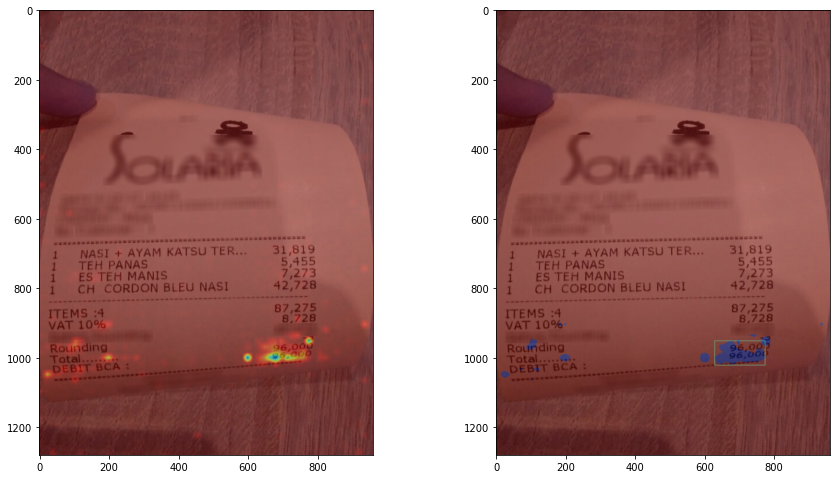

In [27]:
image = cv2.imread("image.jpg")
image = cv2.resize(image, (960, 1280))

raw_heatmap = deepcopy(agg_heatmap)
raw_image = deepcopy(image)

# threshold to remove small attention pockets
thres_heatmap = cv2.threshold(agg_heatmap, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# Find contours
contours = cv2.findContours(thres_heatmap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
bboxes = [cv2.boundingRect(ctr) for ctr in contours]
# only keep box with max area
bboxes = [max(bboxes, key= lambda box: box[2] * box[3])]

for box in bboxes:
    x,y,w,h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (100,255,200), 2)

heatmap_img = cv2.applyColorMap(thres_heatmap, cv2.COLORMAP_JET)
super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, image, 0.5, 0)

super_imposed_raw_heatmap_img = cv2.addWeighted(cv2.applyColorMap(raw_heatmap, cv2.COLORMAP_JET), 0.5, raw_image, 0.5, 0)

# display image with heatmap
images_2_disp = [super_imposed_raw_heatmap_img, super_imposed_img]
plt.figure(figsize=(15, 18))
columns = 2
for i, img2disp in enumerate(images_2_disp):
    plt.subplot(len(images_2_disp) // columns + 1, columns, i + 1)
    plt.imshow(img2disp)